In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/studentsdecision.csv')

# Display the first few rows of the DataFrame to verify
display(df.head())

,Hours,Attendance,Pass,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,60,0,NaN,NaN,NaN,NaN
1,3,65,0,NaN,NaN,NaN,NaN
2,4,70,0,NaN,NaN,NaN,NaN
3,5,75,1,NaN,NaN,NaN,NaN
4,6,80,1,NaN,NaN,NaN,NaN


In [2]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display the updated DataFrame
display(df.head())

,Hours,Attendance,Pass
0,2,60,0
1,3,65,0
2,4,70,0
3,5,75,1
4,6,80,1


In [3]:
# Split into features (X) and target (y)
X = df.drop('Pass', axis=1)
y = df['Pass']

# Display the first few rows of X and y to verify
display(X.head())
display(y.head())

,Hours,Attendance
0,2,60
1,3,65
2,4,70
3,5,75
4,6,80


,Pass
0,0
1,0
2,0
3,1
4,1


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5, 2)
Shape of X_test: (2, 2)
Shape of y_train: (5,)
Shape of y_test: (2,)


In [5]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [6]:
# Initialize and train the Decision Tree Classifier using Gini (default)
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

print("Model training complete using Gini criterion.")

Model training complete using Gini criterion.


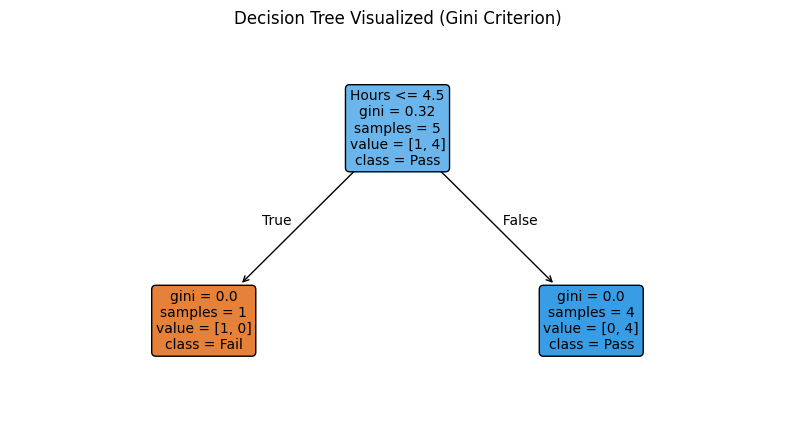

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(10, 5))
plot_tree(model_gini, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True, rounded=True, fontsize=10) # Added fontsize
plt.title("Decision Tree Visualized (Gini Criterion)")
plt.show()